In [1]:
import pandas as pd
import numpy as np

In [2]:
bde_dft = pd.read_csv('model_files/rdf_data_190531.csv.gz')

In [3]:
smiles = 'CCC(C)CC'

In [4]:
from bde.fragment import fragment_iterator

In [5]:
frag_df = pd.DataFrame(fragment_iterator(smiles))

In [6]:
frag_df

,molecule,bond_index,bond_type,fragment1,fragment2,delta_assigned_stereo,delta_unassigned_stereo
0,CCC(C)CC,0,C-C,[CH2]C(C)CC,[CH3],0,1
1,CCC(C)CC,1,C-C,C[CH]CC,[CH2]C,0,0
2,CCC(C)CC,2,C-C,CC[CH]CC,[CH3],0,0
3,CCC(C)CC,3,C-C,C[CH]CC,[CH2]C,0,0
4,CCC(C)CC,4,C-C,[CH2]C(C)CC,[CH3],0,1
5,CCC(C)CC,5,C-H,[H],[CH2]CC(C)CC,0,1
6,CCC(C)CC,6,C-H,[H],[CH2]CC(C)CC,0,1
7,CCC(C)CC,7,C-H,[H],[CH2]CC(C)CC,0,1
8,CCC(C)CC,8,C-H,[H],C[CH]C(C)CC,0,1
9,CCC(C)CC,9,C-H,[H],C[CH]C(C)CC,0,1


In [7]:
frag_df = frag_df[
    (frag_df[['delta_assigned_stereo', 'delta_unassigned_stereo']] == 0).all(1)].drop(
    ['delta_assigned_stereo', 'delta_unassigned_stereo'], 1)

In [8]:
frag_df

,molecule,bond_index,bond_type,fragment1,fragment2
0,C=C(C)[C@H](O)[C@H](O)/C=C/C,1,C-C,C=[C][C@H](O)[C@H](O)/C=C/C,[CH3]
6,C=C(C)[C@H](O)[C@H](O)/C=C/C,8,C-C,[CH3],[CH]=C[C@@H](O)[C@@H](O)C(=C)C
7,C=C(C)[C@H](O)[C@H](O)/C=C/C,9,C-H,[H],[CH]=C(C)[C@H](O)[C@H](O)/C=C/C
8,C=C(C)[C@H](O)[C@H](O)/C=C/C,10,C-H,[H],[CH]=C(C)[C@H](O)[C@H](O)/C=C/C
9,C=C(C)[C@H](O)[C@H](O)/C=C/C,11,C-H,[H],[CH2]C(=C)[C@H](O)[C@H](O)/C=C/C
10,C=C(C)[C@H](O)[C@H](O)/C=C/C,12,C-H,[H],[CH2]C(=C)[C@H](O)[C@H](O)/C=C/C
11,C=C(C)[C@H](O)[C@H](O)/C=C/C,13,C-H,[H],[CH2]C(=C)[C@H](O)[C@H](O)/C=C/C
13,C=C(C)[C@H](O)[C@H](O)/C=C/C,15,H-O,[H],C=C(C)[C@H]([O])[C@H](O)/C=C/C
15,C=C(C)[C@H](O)[C@H](O)/C=C/C,17,H-O,[H],C=C(C)[C@H](O)[C@H]([O])/C=C/C
16,C=C(C)[C@H](O)[C@H](O)/C=C/C,18,C-H,[H],C=C(C)[C@H](O)[C@H](O)/[C]=C/C


In [112]:
import pickle
import warnings

import pandas as pd
from keras.models import load_model

from preprocessor_utils import ConcatGraphSequence
from nfp import custom_layers

with open('model_files/preprocessor.p', 'rb') as f:
    preprocessor = pickle.load(f)

In [113]:
inputs = preprocessor.predict((smiles,))

100%|██████████| 1/1 [00:00<00:00, 564.97it/s]


In [116]:
def check_input(iinput):
    missing_bond = np.array(list(set(iinput['bond_indices'][iinput['bond'] == 1])))
    missing_atom = np.arange(iinput['n_atom'])[iinput['atom'] == 1]
    
    is_outlier = (missing_bond.size != 0) | (missing_atom.size != 0)
    
    return is_outlier, missing_atom, missing_bond
    
assert not check_input(inputs[0])[0]

In [119]:
def draw_mol_outlier(smiles, missing_atoms, missing_bonds, figsize=(300, 300)):

    mol = Chem.MolFromSmiles(smiles)
    missing_bonds_adjusted = []
    for bond_index in missing_bonds:

        if bond_index >= mol.GetNumBonds():

            molH = Chem.AddHs(mol)
            bond = molH.GetBondWithIdx(int(bond_index))

            start_atom = mol.GetAtomWithIdx(bond.GetBeginAtomIdx())
            mol = Chem.AddHs(mol, onlyOnAtoms=[start_atom.GetIdx()])
            bond_index = mol.GetNumBonds() - 1

        missing_bonds_adjusted += [int(bond_index)]

    if not mol.GetNumConformers():
        rdDepictor.Compute2DCoords(mol)

    drawer = rdMolDraw2D.MolDraw2DSVG(*figsize)
    drawer.SetFontSize(.6)
    drawer.DrawMolecule(
        mol, 
        highlightAtoms=[int(index) for index in missing_atoms],
        highlightBonds=missing_bonds_adjusted)

    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()

    svg = svg.replace('svg:', '').replace(':svg', '')

    return svg

In [121]:
# SVG(draw_mol_outlier(smiles, missing_atom, missing_bond))

In [122]:

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    model = load_model('model_files/best_model.hdf5', custom_objects=custom_layers)
    
model.summary()

Model: "graphmodel_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bond (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
atom (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
squeeze_1 (Squeeze)             (None,)              0           atom[0][0]                       
                                                                 bond[0][0]                       
__________________________________________________________________________________________________
atom_embedding (Embedding)      (None, 128)          12672       squeeze_1[0][0]       

In [123]:
pred = model.predict_generator(
    ConcatGraphSequence(inputs, batch_size=1, shuffle=False), verbose=0)

In [134]:
bde_df = pd.DataFrame(inputs[0]['bond_indices'], columns=['bond_index'])
bde_df['bde_pred'] = pred
bde_df = bde_df.groupby('bond_index').mean().reset_index()

pred_df = frag_df.merge(bde_df, on=['bond_index'], how='left')
pred_df = pred_df.sort_values('bde_pred').drop_duplicates(
    ['fragment1', 'fragment2']).reset_index()

In [135]:
pred_df = pred_df.merge(bde_dft[['molecule', 'bond_index', 'bde']], on=['molecule', 'bond_index'], how='left')

In [136]:
pred_df

,index,molecule,bond_index,bond_type,fragment1,fragment2,bde_pred,bde
0,4,C/C=C/[C@H](O)CCCC,8,C-H,[H],[CH2]/C=C/[C@H](O)CCCC,86.986320,86.992828
1,2,C/C=C/[C@H](O)CCCC,6,C-C,[CH2]C[C@@H](O)/C=C/C,[CH2]C,87.040512,87.033616
2,3,C/C=C/[C@H](O)CCCC,7,C-C,[CH2]CC[C@@H](O)/C=C/C,[CH3],89.403885,89.319004
3,1,C/C=C/[C@H](O)CCCC,5,C-C,[CH2][C@@H](O)/C=C/C,[CH2]CC,89.584831,89.325279
4,12,C/C=C/[C@H](O)CCCC,17,C-H,[H],C/C=C/[C@H](O)C[CH]CC,96.821869,96.716707
5,15,C/C=C/[C@H](O)CCCC,20,C-H,[H],C[CH]CC[C@@H](O)/C=C/C,97.110367,97.105135
6,10,C/C=C/[C@H](O)CCCC,15,C-H,[H],C/C=C/[C@H](O)[CH]CCC,98.453384,98.426669
7,18,C/C=C/[C@H](O)CCCC,23,C-H,[H],[CH2]CCC[C@@H](O)/C=C/C,100.091965,100.119061
8,0,C/C=C/[C@H](O)CCCC,0,C-C,[CH3],[CH]=C[C@H](O)CCCC,101.463837,101.692854
9,9,C/C=C/[C@H](O)CCCC,14,H-O,[H],C/C=C/[C@H]([O])CCCC,104.234756,104.344707


In [138]:
pred_df.loc[11, 'bde'] = np.nan

In [142]:
pred_df['has_dft_bde'] = pred_df.bde.notna()

In [141]:
pred_df

,index,molecule,bond_index,bond_type,fragment1,fragment2,bde_pred,bde,has_dft_bde
0,4,C/C=C/[C@H](O)CCCC,8,C-H,[H],[CH2]/C=C/[C@H](O)CCCC,86.986320,86.992828,False
1,2,C/C=C/[C@H](O)CCCC,6,C-C,[CH2]C[C@@H](O)/C=C/C,[CH2]C,87.040512,87.033616,False
2,3,C/C=C/[C@H](O)CCCC,7,C-C,[CH2]CC[C@@H](O)/C=C/C,[CH3],89.403885,89.319004,False
3,1,C/C=C/[C@H](O)CCCC,5,C-C,[CH2][C@@H](O)/C=C/C,[CH2]CC,89.584831,89.325279,False
4,12,C/C=C/[C@H](O)CCCC,17,C-H,[H],C/C=C/[C@H](O)C[CH]CC,96.821869,96.716707,False
5,15,C/C=C/[C@H](O)CCCC,20,C-H,[H],C[CH]CC[C@@H](O)/C=C/C,97.110367,97.105135,False
6,10,C/C=C/[C@H](O)CCCC,15,C-H,[H],C/C=C/[C@H](O)[CH]CCC,98.453384,98.426669,False
7,18,C/C=C/[C@H](O)CCCC,23,C-H,[H],[CH2]CCC[C@@H](O)/C=C/C,100.091965,100.119061,False
8,0,C/C=C/[C@H](O)CCCC,0,C-C,[CH3],[CH]=C[C@H](O)CCCC,101.463837,101.692854,False
9,9,C/C=C/[C@H](O)CCCC,14,H-O,[H],C/C=C/[C@H]([O])CCCC,104.234756,104.344707,False


In [36]:
pred_df['svg'] = pred_df.apply(lambda x: draw_bde(x.molecule, x.bond_index), 1)

0     <IPython.core.display.SVG object>
1     <IPython.core.display.SVG object>
2     <IPython.core.display.SVG object>
3     <IPython.core.display.SVG object>
4     <IPython.core.display.SVG object>
5     <IPython.core.display.SVG object>
6     <IPython.core.display.SVG object>
7     <IPython.core.display.SVG object>
8     <IPython.core.display.SVG object>
9     <IPython.core.display.SVG object>
10    <IPython.core.display.SVG object>
11    <IPython.core.display.SVG object>
12    <IPython.core.display.SVG object>
13    <IPython.core.display.SVG object>
dtype: object

In [32]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def draw_bde(smiles, bond_index, figsize=(300, 300)):
    
    mol = Chem.MolFromSmiles(smiles)
    bond_index = int(bond_index)

    if bond_index >= mol.GetNumBonds():

        molH = Chem.AddHs(mol)
        bond = molH.GetBondWithIdx(bond_index)

        start_atom = mol.GetAtomWithIdx(bond.GetBeginAtomIdx())
        mol = Chem.AddHs(mol, onlyOnAtoms=[start_atom.GetIdx()])
        bond_index = mol.GetNumBonds() - 1

    bond = mol.GetBondWithIdx(bond_index)
    if not mol.GetNumConformers():
        rdDepictor.Compute2DCoords(mol)

    drawer = rdMolDraw2D.MolDraw2DSVG(*figsize)
    drawer.SetFontSize(.6)
    drawer.DrawMolecule(mol, highlightAtoms=[], highlightBonds=[bond_index,])

    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()

    svg = svg.replace('svg:', '').replace(':svg', '')
    
    return SVG(svg)

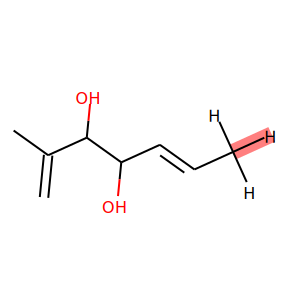

In [33]:
draw_bde(smiles, 21)

In [34]:
def draw_mol(smiles, figsize=(300, 300)):
    
    mol = Chem.MolFromSmiles(smiles)
    rdDepictor.Compute2DCoords(mol)

    drawer = rdMolDraw2D.MolDraw2DSVG(*figsize)
    drawer.SetFontSize(.6)
    drawer.DrawMolecule(mol)

    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()

    svg = svg.replace('svg:', '').replace(':svg', '')
    
    return SVG(svg)

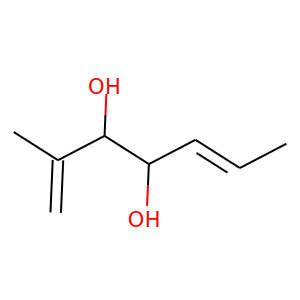

In [35]:
draw_mol(smiles)